In [1]:
import pandas as pd

yield_rates1 = pd.read_csv('data/bond-yield/yield-curve-rates-1990-2021.csv')
yield_rates2 = pd.read_csv('data/bond-yield/yield-curve-rates-2022.csv')
yield_rates3 = pd.read_csv('data/bond-yield/yield-curve-rates-2023.csv')

frames = [yield_rates3, yield_rates2, yield_rates1]
yield_rates = pd.concat(frames, ignore_index=True)
# yield_rates

stock_symbol = 'RY.TO'
bank_data = pd.read_csv('data/banks/{}_delta_extremes.csv'.format(stock_symbol), index_col=0)
# bank_data.head()

spread_10_2 = []
spread_10_3 = []

for i in range(len(yield_rates)):
    spread_10_2.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['2 Yr'])
    spread_10_3.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['3 Mo'])

yield_spread = yield_rates.copy()
yield_spread['spread_10_2'] = spread_10_2
yield_spread['spread_10_3'] = spread_10_3
# yield_spread.head()

yield_dates = pd.to_datetime(yield_spread['Date'])

new_yield = pd.DataFrame({
    'Date' : yield_dates, 
    'spread_10_2': yield_spread['spread_10_2'], 
    'spread_10_3': yield_spread['spread_10_3']
    })
# new_yield.head()

bank_dates = pd.to_datetime(bank_data['Date'])

new_bank = pd.DataFrame({
    'Date': bank_dates,
    'Adj Close': bank_data['Adj Close'],
    'Delta': bank_data['Delta'],
    'Extremes' : bank_data['Extremes']
})
# new_bank.head()

bank_yield = pd.merge(new_yield, new_bank, how='inner')
# bank_yield.head()

bank_yield_copy = bank_yield.copy()
# print(len(bank_yield))
bank_yield_final = bank_yield_copy.dropna().iloc[::-1]
# print(len(bank_yield_final))
# bank_yield_final.head()
df = bank_yield_final.set_index(bank_yield_final['Date'])
df

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
1995-01-13,1995-01-13,0.30,1.97,2.414120,0.952308,Non-Extreme
1995-01-17,1995-01-17,0.26,1.81,2.425963,-1.370387,Non-Extreme
1995-01-18,1995-01-18,0.23,1.84,2.448739,0.938844,Non-Extreme
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme
...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme


In [2]:
# the price/book of ry from 2013-2023
ry_pb_13_23 = {
    '2013':2.34, '2014':2.38, '2015':1.88, '2016':2.1, '2017':2.21, '2018':1.83,
    '2019':1.89, '2020':1.84, '2021':2.08, '2022':1.75, '2023':1.46
    }
print(ry_pb_13_23['2013'])

ry_13_23 = df['2013-01-01': '2023-12-31']
ry_13_23.head()

2.34


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
2013-01-02,2013-01-02,1.59,1.78,39.717976,1.035399,Non-Extreme
2013-01-03,2013-01-03,1.65,1.84,39.849274,0.330576,Non-Extreme
2013-01-04,2013-01-04,1.66,1.86,40.092178,0.609557,Non-Extreme
2013-01-07,2013-01-07,1.65,1.85,39.921497,-0.425721,Non-Extreme
2013-01-08,2013-01-08,1.64,1.82,39.777050,-0.361828,Non-Extreme


In [7]:
price_book = []
for i in range(2013, 2024):
    year = str(i)
    year_len = len(ry_13_23.loc[year])
    for j in range(0, year_len):
        price_book.append(ry_pb_13_23[year])

ry_copy = ry_13_23.copy()
ry_copy['Price/Book'] = price_book

In [5]:
#multiple linear regression model

from sklearn import linear_model
import matplotlib.pyplot as plt

# df = ry_copy.copy()

# column_2 = 'Dividend Yield' , 'Price/Book'

def MLR(df, column_2):
    X = df[['spread_10_3', '{}'.format(column_2)]]
    y = df['Adj Close']

    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    fitted_values = regr.predict(df[['spread_10_3', '{}'.format(column_2)]])
    df['Fitted Values'] =  fitted_values

    plt.scatter(df['spread_10_3'], df['Adj Close'], s=5)
    plt.plot(df['spread_10_3'], df['Fitted Values'], color='red')
    plt.show()

    print('R-Squared: {}'.format(regr.score(X,y)))

    print(regr.coef_)
    print(regr.feature_names_in_)
    print(regr.intercept_)


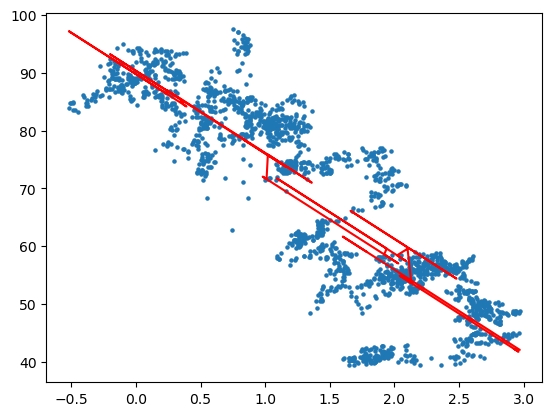

R-Squared: 0.7535497954744654
[-14.29534213 -11.53881992]
['spread_10_3' 'Price/Book']
111.55944801665322


In [12]:
ry_13_20 = ry_copy['2013':'2020'].copy()
# ry_13_20
MLR(ry_13_20, 'Price/Book')